## Importing statements

In [42]:
import glob
import cv2
from IPython.display import Image
from PIL import Image
import os
import ipyplot
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Helper functions

In [44]:
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

def noise(image):

    # Convert image to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate histogram of saturation channel
    s = cv2.calcHist([image], [1], None, [256], [0, 256])

    # Calculate percentage of pixels with saturation >= p
    p = 0.07
    s_perc = np.sum(s[int(p * 255):-1]) / np.prod(image.shape[0:2])
    return s_perc

## Image feature extraction 

In [46]:
def extract_img_param(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    br = calculate_brightness(Image.open(path))
    c = gray.std()
    bl = cv2.Laplacian(gray, cv2.CV_64F).var()
    n= noise(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    return br, c, bl, n

## Plotting graph

In [48]:
def plot_graph(br, c, bl, n):
    xaxis = ["img1", "img2", "img3", "img4", "img5"]
    
    fig, axs = plt.subplots(nrows=2, ncols=2, layout='constrained')
    axs[0, 0].plot(xaxis,br)
    axs[0, 0].plot(xaxis[2],br[2], 'go')
    axs[0, 0].set_title("Brightness")
    axs[0, 1].plot(xaxis,c)
    axs[0, 1].plot(xaxis[2],c[2], 'go')
    axs[0, 1].set_title("Contrast")
    axs[1, 0].plot(xaxis,bl)
    axs[1, 0].plot(xaxis[2],bl[2], 'go')
    axs[1, 0].set_title("Blur")
    axs[1, 1].plot(xaxis,n)
    axs[1, 1].plot(xaxis[2],n[2], 'go')
    axs[1, 1].set_title("Noise")
    plt.show()

## Displaying images

In [50]:
def print_images_and_plot(path):
    images = []
    brightness = []
    contrast = []
    blur = [] 
    noise = []
    directory = os.fsencode(path)
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        imagepath = path+'\\'+ filename
        images.append(imagepath)
        br, c, bl, n = extract_img_param(imagepath)
        brightness.append(br)
        contrast.append(c)
        blur.append(bl)
        noise.append(n)
             
    ipyplot.plot_images(images, max_images=30, img_width=175)
    plot_graph(brightness, contrast, blur, noise)

## Varying brightness

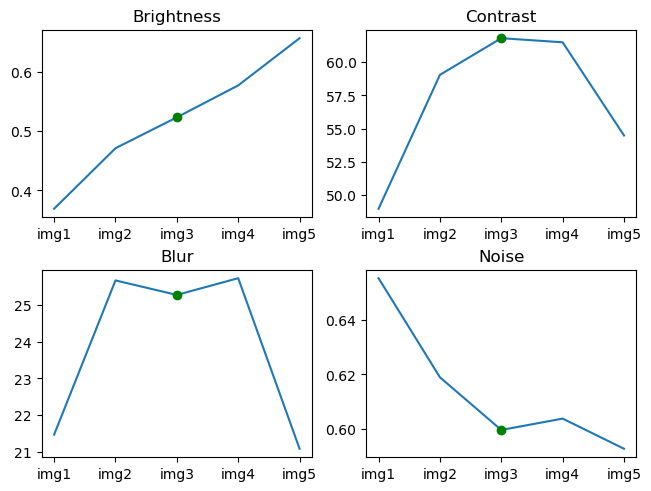

In [52]:
print_images_and_plot(r"brightness")

## Varying contrast

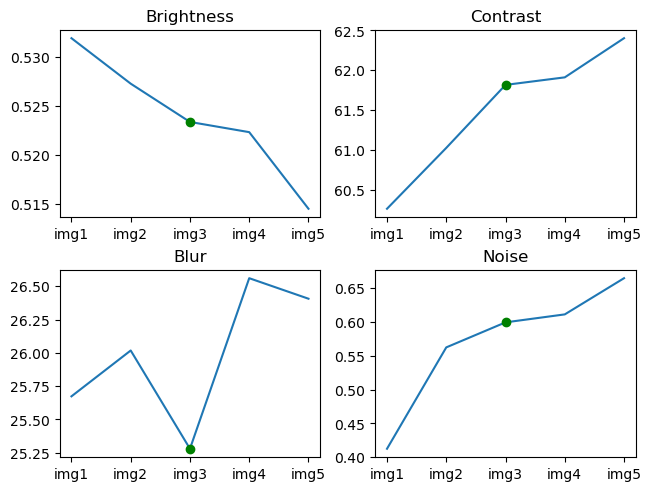

In [54]:
print_images_and_plot(r"contrast")

## Varying blurness

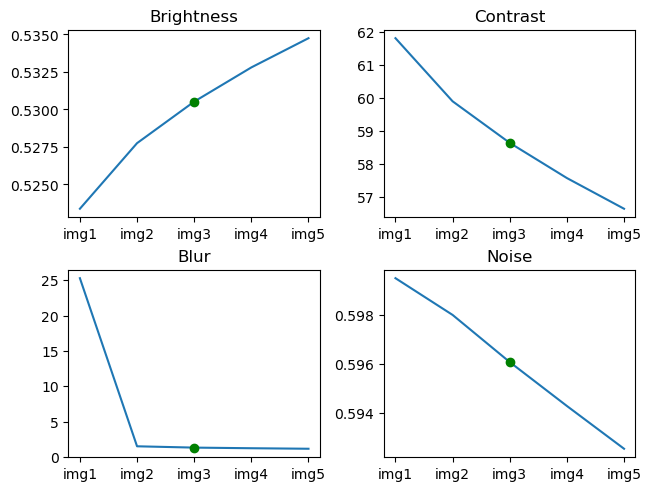

In [56]:
print_images_and_plot(r"blur")

## Varying noise

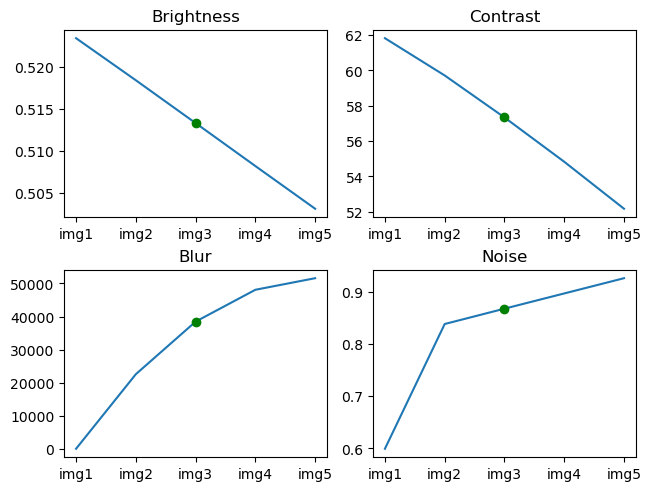

In [58]:
print_images_and_plot(r"noise")

## Generated dataset

In [60]:
import pandas as pd
data = pd.read_csv(r'Data.csv')
data = data.head(16)
print(data)

    Image  Brightness   Contrast  Blurriness     Noise
0       1    0.368948  48.962571   21.462999  0.655386
1       2    0.471176  59.054459   25.675573  0.618911
2       3    0.523384  61.816698   25.279352  0.599519
3       4    0.577307  61.507174   25.736196  0.603707
4       5    0.657039  54.484784   21.077733  0.592611
5       6    0.531945  60.261481   25.672928  0.412461
6       7    0.527297  61.025711   26.017259  0.562473
7       8    0.523384  61.816698   25.279352  0.599519
8       9    0.522342  61.911391   26.560208  0.611306
9      10    0.514512  62.403100   26.406127  0.664871
10     11    0.523384  61.816698   25.279352  0.523384
11     12    0.536446  55.820358    1.094988  0.590538
12     13    0.539718  54.192787    0.961358  0.586602
13     14    0.541809  53.126721    0.885670  0.584417
14     15    0.543377  52.313322    0.832174  0.582524
15     16    0.523384  61.816698   25.279352  0.599519


## Testing

In [62]:
test_images = [r"unsorted\testb.jpg", 
               r"unsorted\test.jpg"]

ipyplot.plot_images(test_images, max_images=3, img_width=300)

## Feature extraction of test image

In [64]:
br, c, bl, n = extract_img_param(r"unsorted\testb.jpg")
data = data._append({'Image':17,'Brightness':br , 'Contrast':c, 'Blurriness':bl, 'Noise':n}, ignore_index=True)
br, c, bl, n = extract_img_param(r"unsorted\test.jpg")
data = data._append({'Image':18,'Brightness':br , 'Contrast':c, 'Blurriness':bl, 'Noise':n}, ignore_index=True)
print(data)

    Image  Brightness   Contrast  Blurriness     Noise
0     1.0    0.368948  48.962571   21.462999  0.655386
1     2.0    0.471176  59.054459   25.675573  0.618911
2     3.0    0.523384  61.816698   25.279352  0.599519
3     4.0    0.577307  61.507174   25.736196  0.603707
4     5.0    0.657039  54.484784   21.077733  0.592611
5     6.0    0.531945  60.261481   25.672928  0.412461
6     7.0    0.527297  61.025711   26.017259  0.562473
7     8.0    0.523384  61.816698   25.279352  0.599519
8     9.0    0.522342  61.911391   26.560208  0.611306
9    10.0    0.514512  62.403100   26.406127  0.664871
10   11.0    0.523384  61.816698   25.279352  0.523384
11   12.0    0.536446  55.820358    1.094988  0.590538
12   13.0    0.539718  54.192787    0.961358  0.586602
13   14.0    0.541809  53.126721    0.885670  0.584417
14   15.0    0.543377  52.313322    0.832174  0.582524
15   16.0    0.523384  61.816698   25.279352  0.599519
16   17.0    0.531010  58.417642    1.306441  0.595771
17   18.0 

## Normalizing the dataset

In [66]:
scaler = MinMaxScaler()
data[["SContrast", "SBlurriness"]] = scaler.fit_transform(data[["Contrast", "Blurriness"]])
del data["Contrast"]
del data["Blurriness"] 
print(data)

    Image  Brightness     Noise  SContrast  SBlurriness
0     1.0    0.368948  0.655386   0.000000     0.801881
1     2.0    0.471176  0.618911   0.544425     0.965616
2     3.0    0.523384  0.599519   0.693439     0.950216
3     4.0    0.577307  0.603707   0.676741     0.967972
4     5.0    0.657039  0.592611   0.297906     0.786907
5     6.0    0.531945  0.412461   0.609540     0.965513
6     7.0    0.527297  0.562473   0.650768     0.978897
7     8.0    0.523384  0.599519   0.693439     0.950216
8     9.0    0.522342  0.611306   0.698547     1.000000
9    10.0    0.514512  0.664871   0.725073     0.994011
10   11.0    0.523384  0.523384   0.693439     0.950216
11   12.0    0.536446  0.590538   0.369955     0.010215
12   13.0    0.539718  0.586602   0.282153     0.005021
13   14.0    0.541809  0.584417   0.224642     0.002079
14   15.0    0.543377  0.582524   0.180762     0.000000
15   16.0    0.523384  0.599519   0.693439     0.950216
16   17.0    0.531010  0.595771   0.510071     0

## Ranking

In [68]:
data['Rank'] = data[["Brightness","Noise","SContrast","SBlurriness"]].mean(axis=1)
print(data)

    Image  Brightness     Noise  SContrast  SBlurriness      Rank
0     1.0    0.368948  0.655386   0.000000     0.801881  0.456554
1     2.0    0.471176  0.618911   0.544425     0.965616  0.650032
2     3.0    0.523384  0.599519   0.693439     0.950216  0.691639
3     4.0    0.577307  0.603707   0.676741     0.967972  0.706432
4     5.0    0.657039  0.592611   0.297906     0.786907  0.583616
5     6.0    0.531945  0.412461   0.609540     0.965513  0.629865
6     7.0    0.527297  0.562473   0.650768     0.978897  0.679858
7     8.0    0.523384  0.599519   0.693439     0.950216  0.691639
8     9.0    0.522342  0.611306   0.698547     1.000000  0.708049
9    10.0    0.514512  0.664871   0.725073     0.994011  0.724617
10   11.0    0.523384  0.523384   0.693439     0.950216  0.672606
11   12.0    0.536446  0.590538   0.369955     0.010215  0.376789
12   13.0    0.539718  0.586602   0.282153     0.005021  0.353373
13   14.0    0.541809  0.584417   0.224642     0.002079  0.338237
14   15.0 

## Visualization

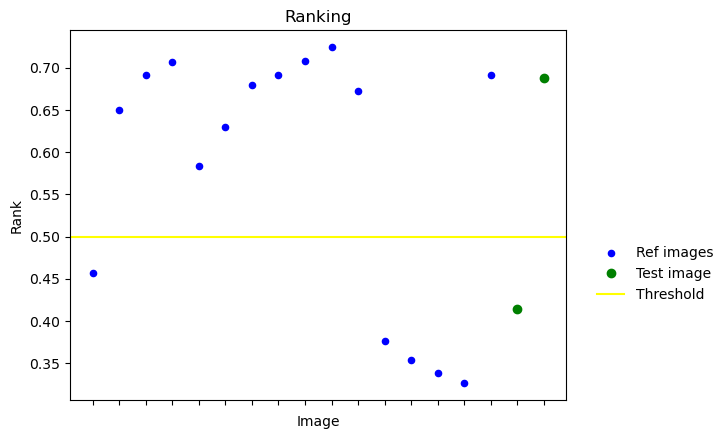

In [70]:
p = data.plot(kind = 'scatter', x = 'Image',y = 'Rank',color = 'blue', label = "Ref images")
p.set(xticklabels=[]) 
plt.title("Ranking")
plt.xticks(np.arange(0,20,1))
p.plot(data["Image"][16], data["Rank"][16], 'go', label="Test image")
p.plot(data["Image"][17], data["Rank"][17], 'go')
plt.axhline(0.5, 0, 1, color='yellow', label = 'Threshold')
plt.legend(loc=(1.05, 0.25), frameon=False)
plt.show()

Test image below the threshold is classified as low quality while the above as good quality